In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(os.path.dirname(os.getcwd()))
from src.preprocess.preprocess import Preprocess
from src.feat_engg.feat import Features

path = "data"

In [3]:
users = pd.read_csv("data/raw_data/users.csv")
books = pd.read_csv("data/raw_data/books.csv")
ratings = pd.read_csv("data/raw_data/ratings.csv")

/var/folders/nb/j0fz9mcs1lv5q2y83pmm1rfc0000gp/T/ipykernel_5633/794886691.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("data/raw_data/books.csv")


In [4]:
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


None

In [5]:
print(users["User-ID"].nunique())

278858


In [6]:
display(books.info())
for col in books.columns:
   books[col] = books[col].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


None

In [7]:
display(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


None

In [3]:
#Preprocess data move to class to modularize code

pp = Preprocess(path)
pp.main()

/Users/ritisha/projects/simple_recommendation/src/preprocess/preprocess.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv(self.path + "/raw_data/Books.csv")


Data has been preprocessed and saved to data/preprocessed/preprocessed_data.csv


In [6]:
all_data=pd.read_csv("data/preprocessed/preprocessed_data.csv")

/var/folders/nb/j0fz9mcs1lv5q2y83pmm1rfc0000gp/T/ipykernel_5656/3995268352.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("data/preprocessed/preprocessed_data.csv")


We have 278,858 unique users in the data. We have 271,360 books in the dataset. 

In [176]:
display(all_data.shape)

(1323367, 12)

In [8]:
# Create User Level Features
# Mean Rating Given by user
# Number of ratings given by user
# Create Book Level Features

ft = Features(path)
ft.main()

/Users/ritisha/projects/simple_recommendation/src/feat_engg/feat.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.path + "preprocessed/preprocessed_data.csv")


Features have been generated and saved to data/features/feat_data.csv
User-Item similarity scores have been generated and saved to datafeatures/item_similarity.csv


In [10]:
feat_df = pd.read_csv(f"{path}/features/feat_data.csv")

/var/folders/nb/j0fz9mcs1lv5q2y83pmm1rfc0000gp/T/ipykernel_5656/820184705.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  feat_df = pd.read_csv(f"{path}/features/feat_data.csv")


In [11]:
item_similarity_df = pd.read_csv(f"{path}/features/item_similarity.csv")

/var/folders/nb/j0fz9mcs1lv5q2y83pmm1rfc0000gp/T/ipykernel_5656/1705512792.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  item_similarity_df = pd.read_csv(f"{path}/features/item_similarity.csv")


In [12]:
books_by_author = (
    feat_df.groupby("book_author")
    .aggregate({"isbn": "nunique"})
    .reset_index()
    .sort_values("isbn", ascending=False)
    .head(10)
)
ratings_by_author = (
    feat_df.groupby("book_author")
    .aggregate({"book_rating_weighted": "max"})
    .reset_index()
    .sort_values("book_rating_weighted", ascending=False)
    .head(10)
)

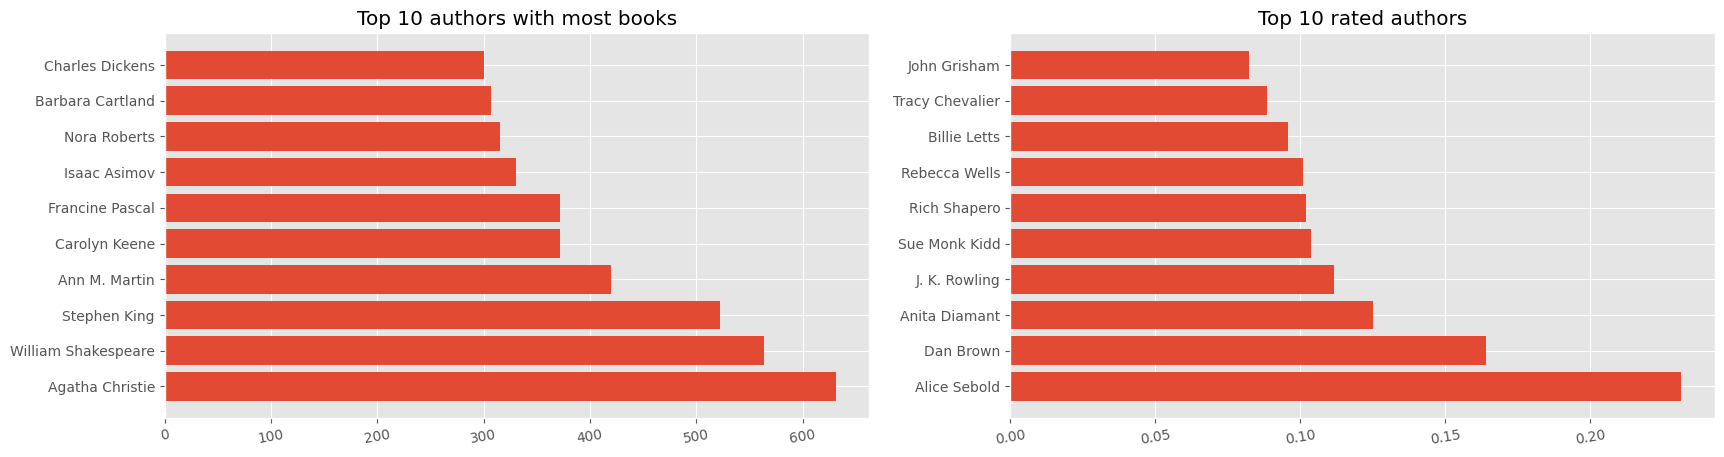

In [13]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.barh(books_by_author["book_author"], books_by_author["isbn"])
plt.xticks(rotation=10)
plt.title("Top 10 authors with most books")
plt.subplot(1, 2, 2)
plt.barh(ratings_by_author["book_author"], ratings_by_author["book_rating_weighted"])
plt.xticks(rotation=10)
plt.title("Top 10 rated authors")
plt.show()

In [23]:
display(item_similarity_df[item_similarity_df["isbn_self"]!=item_similarity_df["isbn"]].sort_values("user_item_similarity", ascending=False).head(10))

,isbn_self,isbn,user_item_similarity
141306772,0515131105,1551666308,1.0
88877330,0671568825,0671778730,1.0
59392741,0373272367,0553240390,1.0
44038723,0373764677,451197860,1.0
9259843,0373272367,0373764677,1.0
59392954,0373764677,0553240390,1.0
44038510,0373272367,451197860,1.0
59398036,0451197860,0553240390,1.0
84664058,0140119698,067167725X,1.0
119260412,0451402502,0804112975,1.0
